# Real estate market analysis

**The project's task is to analyze real estate market in St Petersburg.**

## Results

- It can be noted that in the center of St. Petersburg apartments are larger in area, they have higher ceilings, more rooms - this also explains the fact that the prices of such apartments are higher than in the region. We got a similar chart in terms of the effect of the floor and publication date on the price.
- It can be argued that the value of real estate is most affected by what floor it is located on, its area and the number of rooms. The last two parameters are positively correlated with the price. However, if the apartment is located on the first floor, then, as a rule, its price is lower. 
- There is no correlation between price and distance to the center. However, the price rises by several million rubles if it is located within the central district of St. Petersburg.
- It is also worth noting that you can sell an apartment for more if you place an ad in the middle of the working week, in late spring or mid-autumn.

## Some remarks

Preprocessing revealed some problems in the data:
- Part of the data contains incorrect values for the square of the living and kitchen areas. Some of these errors may be associated with the scam. However, most likely, the users who entered these values do not know how to define such zones in apartments. Therefore, I reccomend to make the hints next to the input field, such as what does the living area mean, and what does the kitchen mean. It is also possible to limit the input values for the living and kitchen areas.
- Part of the data contains incorrect values for the ceiling heights that are below 2.5 m. 
- Part of the data contains incorrect values for the the locality names. I recommend to regularly update the list of the locality names for the users.
- The one part of the data in the balconies feature contains the number of the balconies in the apartment and in the other part the balconies feature contains the square of the balconies. Apparently the description of the input field is not clear to the users and needs to be changed.

## Data understanding

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Preprocessing

In [6]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data['is_apartment'].value_counts())
print(data['is_apartment'].isna().sum())

False    23649
True        50
Name: is_apartment, dtype: int64

0


In [8]:
data.query('balcony == 3').groupby('rooms')['balcony'].count()

rooms
1     2
2    21
3    41
4    12
5     4
7     1
Name: balcony, dtype: int64

In [9]:
data.query('balcony == 4').groupby('rooms')['balcony'].count()

rooms
1    16
2    61
3    83
4    18
5     5
Name: balcony, dtype: int64

In [10]:
data.query('balcony == 5').groupby('rooms')['balcony'].count()

rooms
1     25
2     83
3    166
4     23
5      5
7      2
Name: balcony, dtype: int64

In [11]:
def balcony_func(row):
    if row['balcony'] > 2:
        if row['rooms'] == 1:
            return 1
    if row['balcony'] > 3:
        if row['rooms'] == 2:
            return 1
    return  row['balcony']
        
data['balcony'] = data.apply(balcony_func, axis=1)

In [12]:
data[data['balcony'].isna()].groupby('rooms')['total_area'].count()

rooms
0       71
1     3819
2     3810
3     2860
4      652
5      187
6       68
7       32
8        8
9        6
11       2
12       1
14       1
15       1
19       1
Name: total_area, dtype: int64

In [13]:
data[data['rooms'] < 4] = data.fillna({'balcony': 0})
data[data['rooms'] >= 4] = data.fillna({'balcony': 'unknown'})
print(data['balcony'].isna().sum())

0


In [14]:
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Text(0.5, 1.0, 'Расстояние до центра у квартир в Санкт-Петербурге')

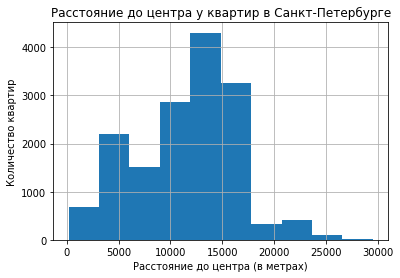

In [15]:
data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].hist()
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до центра (в метрах)')
plt.title('Расстояние до центра у квартир в Санкт-Петербурге')

In [16]:
data[data['cityCenters_nearest'] < 18000] = data.fillna({'locality_name': 'Санкт-Петербург'})
data[data['locality_name'].isna()].shape[0]

12

In [17]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isna().sum()

0

In [18]:
data['locality_name'].value_counts().head(20)

Санкт-Петербург            15758
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

In [19]:
data.loc[data['locality_name'] == 'деревня Кудрово', 'locality_name'] = 'Кудрово'
data['locality_name'].value_counts().head()

Санкт-Петербург    15758
посёлок Мурино       522
Кудрово              472
посёлок Шушары       440
Всеволожск           398
Name: locality_name, dtype: int64

In [20]:
def locality_func(value):
    value = value.replace('ё', 'е')
    value = value.replace('деревня', '')
    value = value.replace('поселок', '')
    value = value.replace('городского типа', '')
    value = value.replace('городской', '')
    value = value.replace('коттеджный', '')
    value = value.replace('при железнодорожной станции', '')
    value = value.replace('садоводческое некоммерческое товарищество', '')
    value = value.replace('садовое товарищество', '')
    value = value.replace('село', '')
    value = value.replace('станции', '')
    value = value.strip()
    return value

In [21]:
data['locality_name'] = data['locality_name'].apply(locality_func)

Text(0, 0.5, 'Количество квартир')

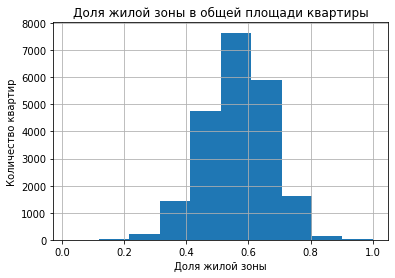

In [22]:
(data['living_area']/data['total_area']).hist()
plt.title('Доля жилой зоны в общей площади квартиры')
plt.xlabel('Доля жилой зоны')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

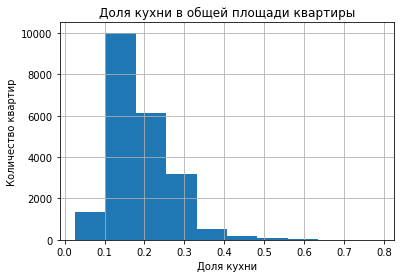

In [23]:
(data['kitchen_area']/data['total_area']).hist()
plt.title('Доля кухни в общей площади квартиры')
plt.xlabel('Доля кухни')
plt.ylabel('Количество квартир')

In [24]:
data['living_area'] = data['living_area'].fillna((data['living_area']/data['total_area']).median()*data['total_area'])

In [25]:
data['kitchen_area'] = data['kitchen_area'].fillna((data['kitchen_area']/data['total_area']).median()*data['total_area'])

In [26]:
data.drop(data.query('(living_area + kitchen_area) >= total_area').index, axis=0, inplace=True)
data.query('(kitchen_area+living_area) >= total_area').shape[0]

0

Text(0.5, 0, 'Площадь (в метрах квадратных)')

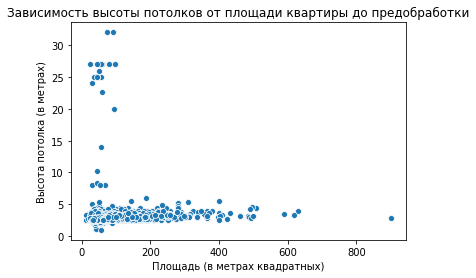

In [27]:
sns.scatterplot(x=data['total_area'], y=data['ceiling_height'])
plt.title('Зависимость высоты потолков от площади квартиры до предобработки')
plt.ylabel('Высота потолка (в метрах)')
plt.xlabel('Площадь (в метрах квадратных)')

In [28]:
data.drop(data.query('7 < ceiling_height < 20').index, axis=0, inplace=True)
data.query('7 < ceiling_height < 20').shape[0]

0

In [29]:
def ceiling_func(row):
    if row['ceiling_height'] < 2.5:
         return 2.5
    if row['ceiling_height'] > 7:
         return row['ceiling_height']/10
    return  row['ceiling_height']
        
data['ceiling_height'] = data.apply(ceiling_func, axis=1)

In [30]:
data.drop(data.query('ceiling_height < 2.5').index, axis=0, inplace=True)

In [31]:
data.query('floors_total > 36')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,14.00,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.50,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [32]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 0

In [33]:
data.drop(data.query('floors_total > 36').index, axis=0, inplace=True)

In [34]:
data.query('floors_total < floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,0.0,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


In [35]:
data.drop(2253, axis=0, inplace=True)

In [36]:
data.dropna(subset=['floors_total'], inplace=True)

In [37]:
data.sort_values('last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.000000,25,False,...,40.500000,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.000000,1,False,...,6.000000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,30.664435,3,False,...,9.310345,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,22.714396,1,False,...,6.896552,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.300000,4,False,...,8.500000,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [38]:
data.loc[data['last_price'] == 12190, 'last_price'] = 12190000
data['price_per_meter'] = data['last_price']/data['total_area']
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

In [44]:
def floor_func(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'
        
data['floor_grouped'] = data.apply(floor_func, axis=1)

In [45]:
data['living_ratio'] = data['living_area']/data['total_area']

In [46]:
data['kitchen_ratio'] = data['kitchen_area']/data['total_area']

In [47]:
for column in ['last_price', 
               'total_area',
               'living_area',
               'floors_total',
               'kitchen_area',
               'price_per_meter']:
    data[column] = data[column].astype('int')

## EDA

Text(0, 0.5, 'Количество')

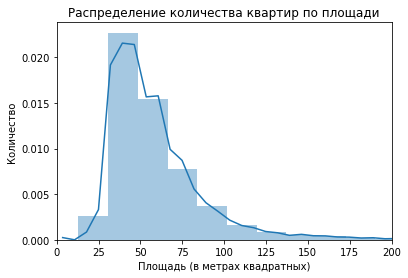

In [48]:
sns.distplot(data['total_area'])
plt.xlim(0,200)
plt.title('Распределение количества квартир по площади')
plt.xlabel('Площадь (в метрах квадратных)')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество квартир')

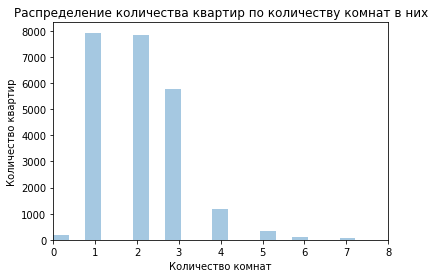

In [49]:
sns.distplot(data['rooms'], kde=False)
plt.xlim(0,8)
plt.title('Распределение количества квартир по количеству комнат в них')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

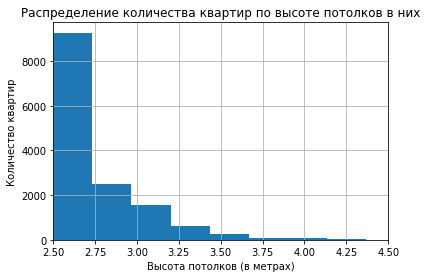

In [50]:
data['ceiling_height'].hist(bins=15)
plt.xlim(2.5,4.5)
plt.title('Распределение количества квартир по высоте потолков в них')
plt.xlabel('Высота потолков (в метрах)')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

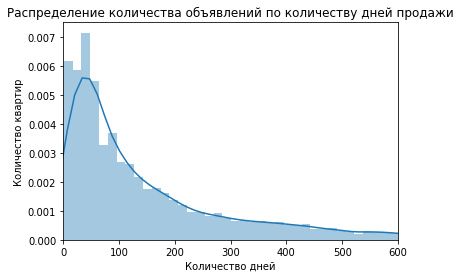

In [51]:
sns.distplot(data['days_exposition'], bins=100)
plt.xlim(0,600)
plt.title('Распределение количества объявлений по количеству дней продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

In [52]:
data['days_exposition'].describe()

count    20265.000000
mean       181.236319
std        219.972380
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [53]:
data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург    15563
Мурино               574
Кудрово              465
Шушары               438
Всеволожск           390
Пушкин               368
Колпино              337
Парголово            326
Гатчина              303
Выборг               234
Name: locality_name, dtype: int64

In [54]:
data[data['locality_name'].isin(('Санкт-Петербург', 
                                 'посёлок Мурино', 
                                 'Кудрово', 
                                 'посёлок Шушары', 
                                 'Всеволожск', 
                                 'Пушкин', 
                                 'Колпино', 
                                 'посёлок Парголово', 
                                 'Гатчина',
                                 'Выборг'))].groupby('locality_name')['price_per_meter'].agg('mean').sort_values(ascending=False)


locality_name
Санкт-Петербург    114665.866928
Пушкин             103179.959239
Кудрово             95225.746237
Колпино             75480.118694
Гатчина             68624.689769
Всеволожск          68582.679487
Выборг              58303.294872
Name: price_per_meter, dtype: float64

### Define the influence of various factors on the cost of the apartments

Text(0, 0.5, 'Количество квартир')

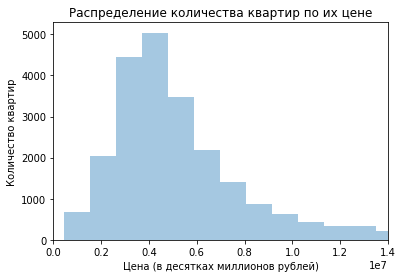

In [55]:
sns.distplot(data['last_price'], bins=700, kde=False)
plt.xlim(0,14000000)
plt.title('Распределение количества квартир по их цене')
plt.xlabel('Цена (в десятках миллионов рублей)')
plt.ylabel('Количество квартир')

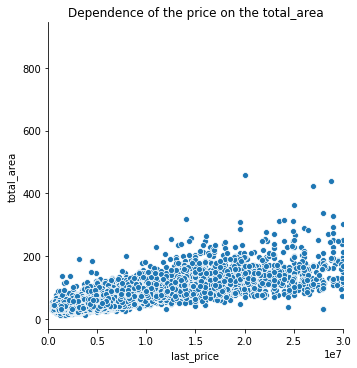

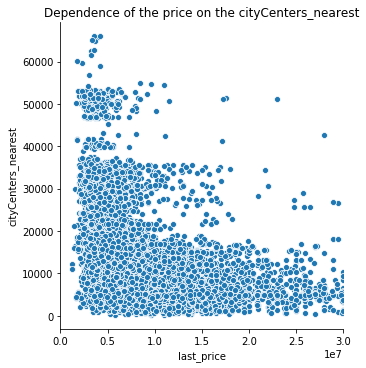

In [56]:
for column in ['total_area',
              'cityCenters_nearest']:
    sns.relplot(data=data, x='last_price', y=column)
    plt.xlim(0,30000000)
    plt.title('Dependence of the price on the '+column)

In [57]:
data['total_area'].corr(data['last_price'])

0.6534591755754314

- There is a slight correlation between price and area: the larger one, the larger the other.

Text(0.5, 0, 'Год')

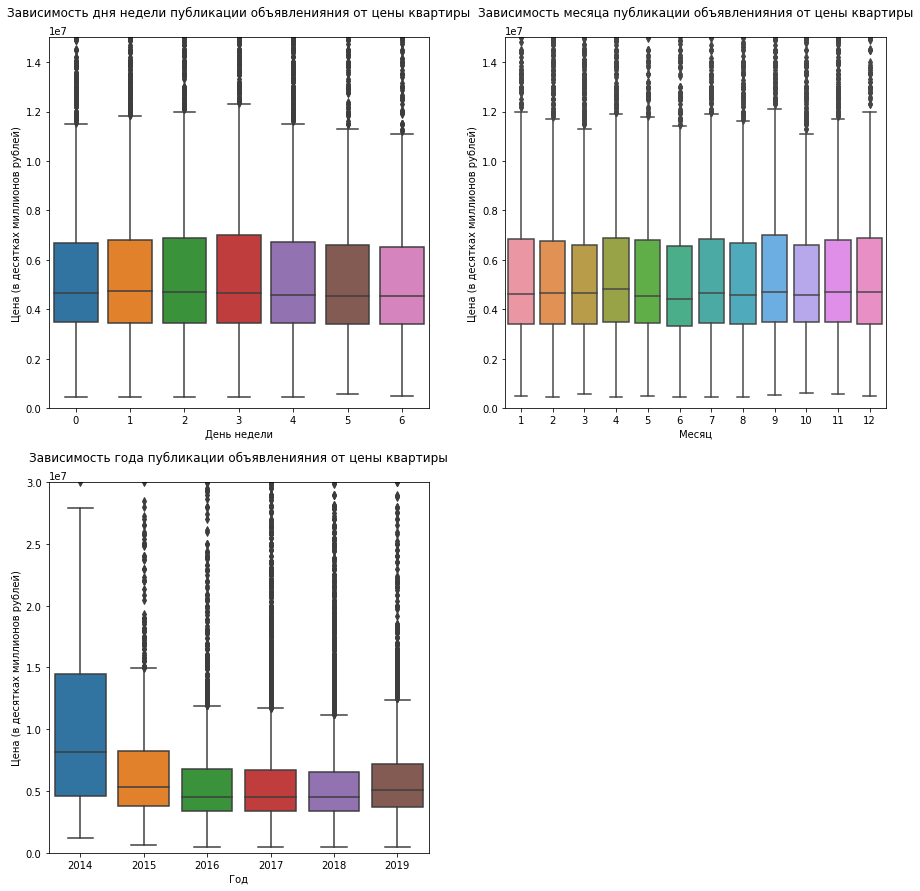

In [58]:
figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x='weekday_publication', y='last_price', data=data)
plt.ylim(0, 15000000)
plt.title('Зависимость дня недели публикации объявленияния от цены квартиры\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('День недели')

plt.subplot(2, 2, 2)
sns.boxplot(x='month_publication', y='last_price', data=data)
plt.ylim(0, 15000000)
plt.title('Зависимость месяца публикации объявленияния от цены квартиры\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Месяц')

plt.subplot(2, 2, 3)
sns.boxplot(x='year_publication', y='last_price', data=data)
plt.ylim(0, 30000000)
plt.title('Зависимость года публикации объявленияния от цены квартиры\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Год')

In Months, we observe a small peak in prices in spring, in April, and in autumn, in September. And a slight drop in the summer months. The decline can perhaps be explained by the vacations of people and, as a result, less activity in the real estate market. Peaks are hard to explain. The peak in the Days of the week is naturally in the middle of the week - people are not tired yet, but they have already moved away from the stormy weekend. The peak in 2014 is difficult to explain, but the gradual rise since 2019 can be explained by the construction of the Lakhta Center. The business center has attracted investment in the city, which has increased the price of real estate.

Text(0.5, 0, 'Количество комнат')

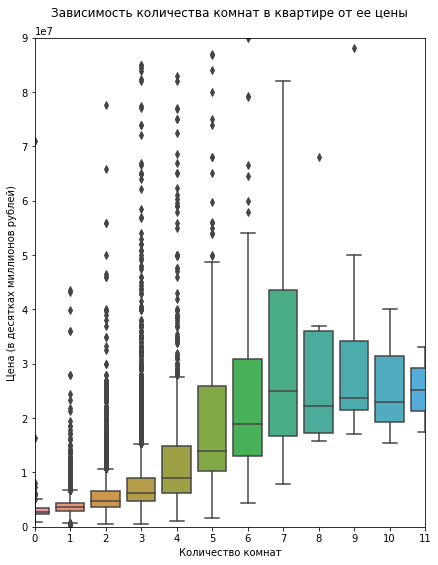

In [59]:
figure(figsize=(7, 9))
sns.boxplot(x='rooms', y='last_price', data=data)
plt.xlim(0, 11)
plt.ylim(0, 90000000)
plt.title('Зависимость количества комнат в квартире от ее цены\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Количество комнат')

The higher the price of the apartment, the larger the area. The higher the price of the apartment, the more of the rooms.

Text(0.5, 0, 'Этаж')

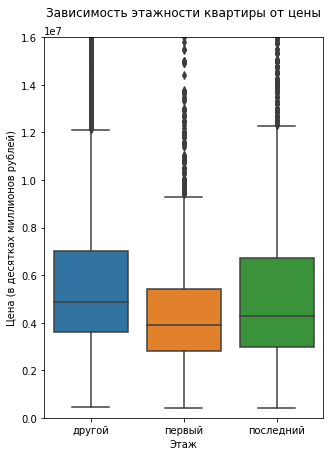

In [60]:
figure(figsize=(5, 7))
sns.boxplot(x='floor_grouped', y='last_price', data=data)
plt.ylim(0, 16000000)
plt.title('Зависимость этажности квартиры от цены\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Этаж')

Nobody wants to live on the first floors.

In [61]:
data[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_meter,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.737302,0.653459,0.361677,-0.205808
price_per_meter,0.737302,1.000000,0.303082,0.054370,-0.317301
total_area,0.653459,0.303082,1.000000,0.758214,-0.231202
rooms,0.361677,0.054370,0.758214,1.000000,-0.185834
cityCenters_nearest,-0.205808,-0.317301,-0.231202,-0.185834,1.000000


### Apartments in the central part of St. Petersburg

In [62]:
data['nearest_km'] = round(data['cityCenters_nearest']/1000, 0)

In [63]:
spb_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='nearest_km', values='last_price', aggfunc='mean')

Text(0.5, 0, 'Растояние до центра (в километрах)')

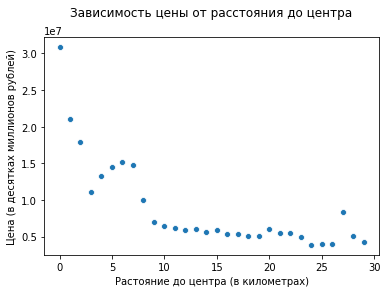

In [64]:
sns.scatterplot(x=spb_data.index, y=spb_data['last_price'])
plt.title('Зависимость цены от расстояния до центра\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Растояние до центра (в километрах)')

In [65]:
city_centre = data.query('locality_name == "Санкт-Петербург" and nearest_km <= 8')

Text(0, 0.5, 'Количество квартир')

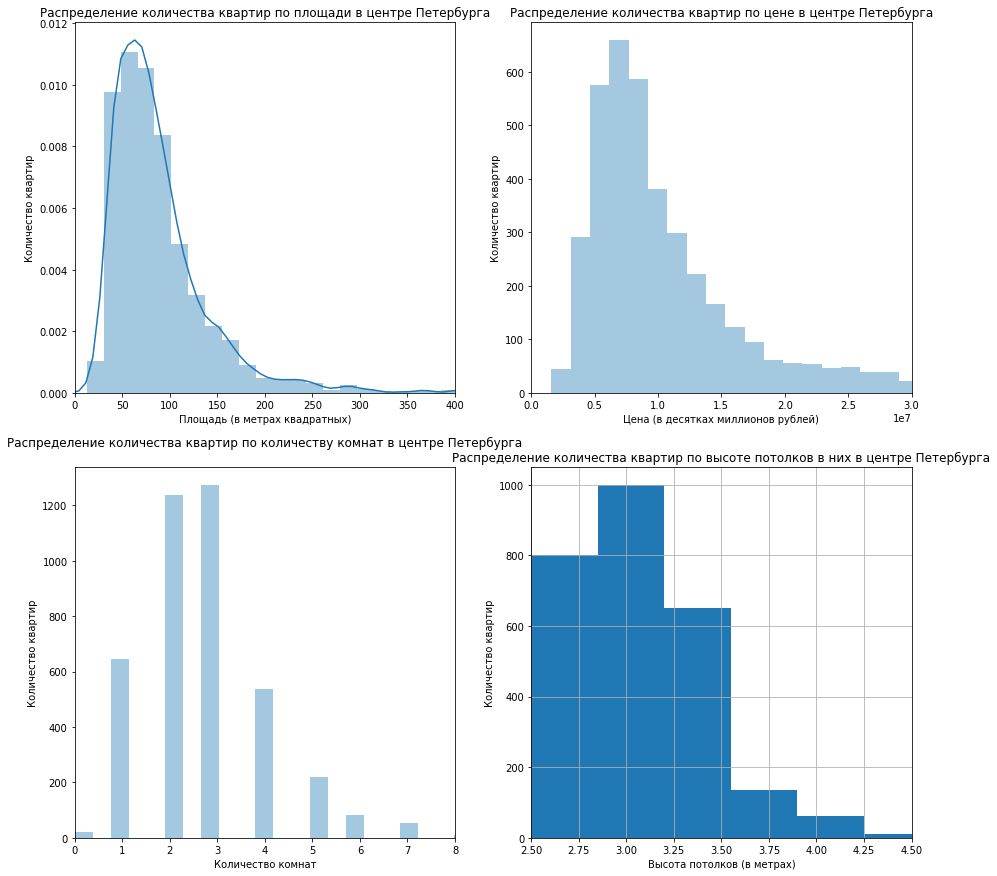

In [66]:
figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.distplot(city_centre['total_area'])
plt.xlim(0,400)
plt.title('Распределение количества квартир по площади в центре Петербурга')
plt.xlabel('Площадь (в метрах квадратных)')
plt.ylabel('Количество квартир')

plt.subplot(2, 2, 2)
sns.distplot(city_centre['last_price'], kde=False, bins=500)
plt.xlim(0,30000000)
plt.title('Распределение количества квартир по цене в центре Петербурга')
plt.xlabel('Цена (в десятках миллионов рублей)')
plt.ylabel('Количество квартир')

plt.subplot(2, 2, 3)
sns.distplot(city_centre['rooms'], kde=False)
plt.xlim(0,8)
plt.title('Распределение количества квартир по количеству комнат в центре Петербурга\n')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

plt.subplot(2, 2, 4)
city_centre['ceiling_height'].hist(bins=10)
plt.xlim(2.5,4.5)
plt.title('Распределение количества квартир по высоте потолков в них в центре Петербурга')
plt.xlabel('Высота потолков (в метрах)')
plt.ylabel('Количество квартир')

Text(0.5, 6.79999999999999, 'Цена (в десятках миллионов рублей)')

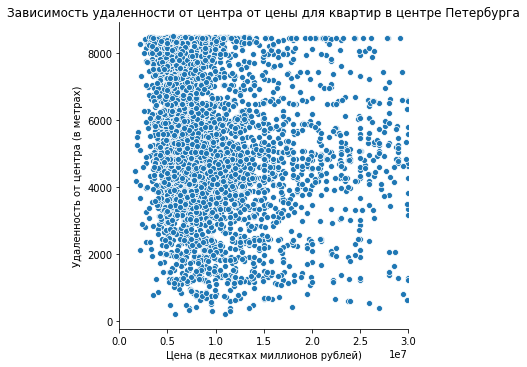

In [67]:
sns.relplot(data=city_centre, x='last_price', y='cityCenters_nearest')
plt.xlim(0,30000000)
plt.title('Зависимость удаленности от центра от цены для квартир в центре Петербурга')
plt.ylabel('Удаленность от центра (в метрах)')
plt.xlabel('Цена (в десятках миллионов рублей)')

In [68]:
city_centre['cityCenters_nearest'].corr(city_centre['last_price'])

-0.07770363191322957

Text(0.5, 0, 'Этаж')

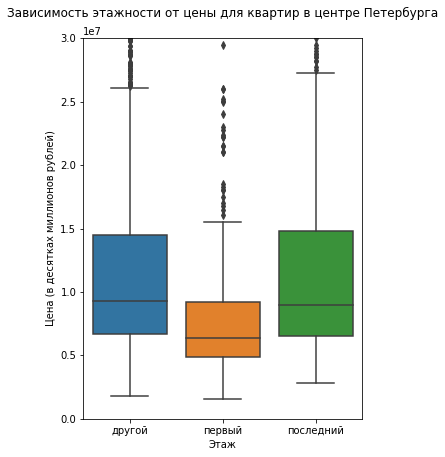

In [69]:
figure(figsize=(5, 7))
sns.boxplot(x='floor_grouped', y='last_price', data=city_centre)
plt.ylim(0, 30000000)
plt.title('Зависимость этажности от цены для квартир в центре Петербурга\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Этаж')

Text(0.5, 0, 'Количество комнат')

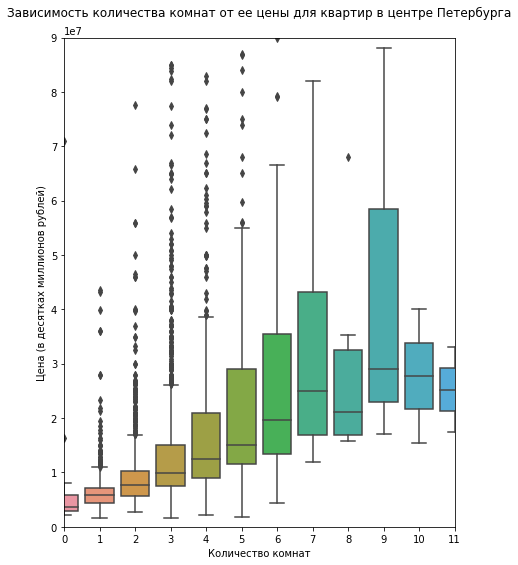

In [70]:
figure(figsize=(7, 9))
sns.boxplot(x='rooms', y='last_price', data=city_centre)
plt.xlim(0, 11)
plt.ylim(0, 90000000)
plt.title('Зависимость количества комнат от ее цены для квартир в центре Петербурга\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Количество комнат')

Text(0.5, 0, 'Год')

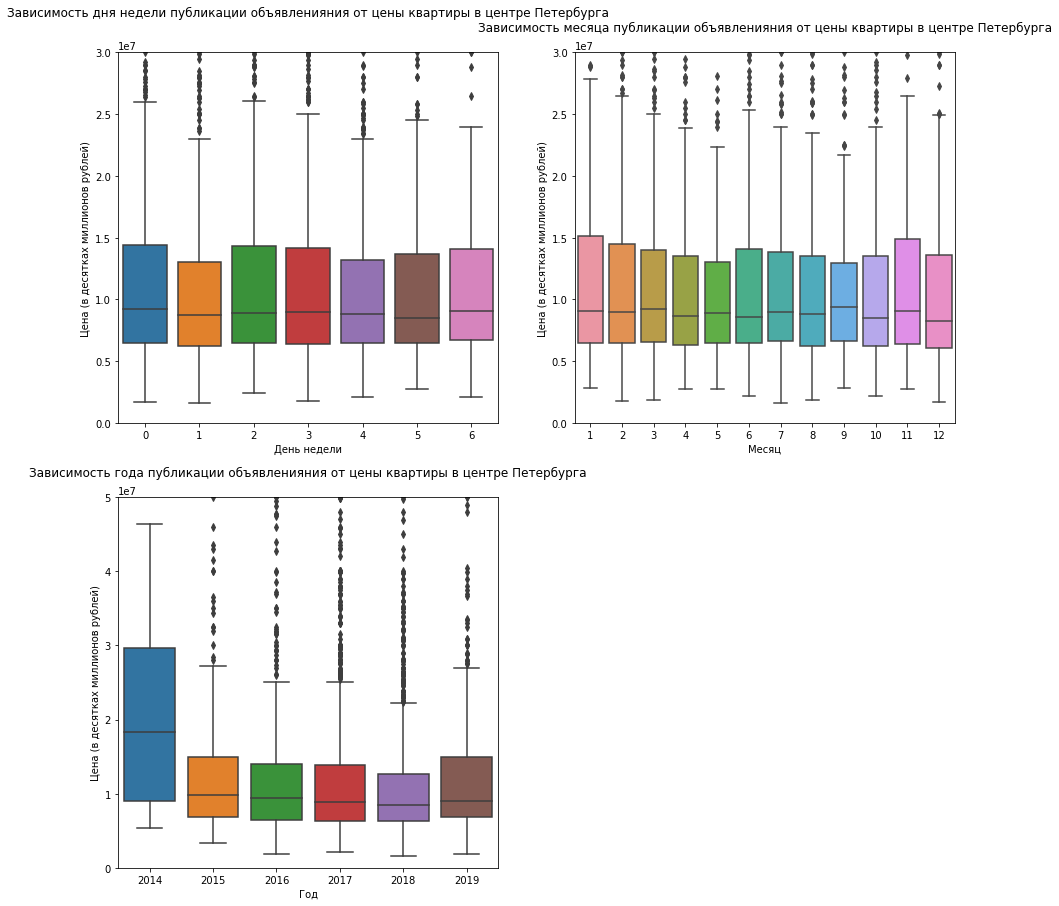

In [71]:
figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x='weekday_publication', y='last_price', data=city_centre)
plt.ylim(0, 30000000)
plt.title('Зависимость дня недели публикации объявленияния от цены квартиры в центре Петербурга\n\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('День недели')

plt.subplot(2, 2, 2)
sns.boxplot(x='month_publication', y='last_price', data=city_centre)
plt.ylim(0, 30000000)
plt.title('Зависимость месяца публикации объявленияния от цены квартиры в центре Петербурга\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Месяц')

plt.subplot(2, 2, 3)
sns.boxplot(x='year_publication', y='last_price', data=city_centre)
plt.ylim(0, 50000000)
plt.title('Зависимость года публикации объявленияния от цены квартиры в центре Петербурга\n')
plt.ylabel('Цена (в десятках миллионов рублей)')
plt.xlabel('Год')

In the Days of the week we see three recessions - on Tuesday, Friday and Sunday. The last two can be explained by weekends or proximity to them, and Tuesday is difficult to explain. The Months peaks in January, June and November. Perhaps the peaks are associated with previous recessions due to the New Year and May holidays, respectively, and vacations in late summer and early September. In Years, the price peaks again in 2014, then the price drops until 2019. And, as already mentioned, perhaps a slight price increase in 2019 is associated with the Lakhta Center.

In [72]:
city_centre[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_meter,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.778869,0.638576,0.337395,-0.077704
price_per_meter,0.778869,1.000000,0.256136,0.010533,-0.060464
total_area,0.638576,0.256136,1.000000,0.743011,-0.143130
rooms,0.337395,0.010533,0.743011,1.000000,-0.211790
cityCenters_nearest,-0.077704,-0.060464,-0.143130,-0.211790,1.000000
